# NYC Flights 2013 Dataset Analysis

## Performing Exploratory Data Analysis

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
flights_df= pd.read_csv('flights.csv')
weather_df= pd.read_csv('weather.csv')



Посмотрим как зависит количество и длинна зажерек от длинны полета

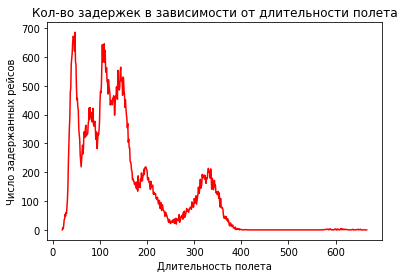

In [34]:

filtered_flights_df = flights_df[flights_df.dep_delay>10]
filtered_flights_df = filtered_flights_df[filtered_flights_df.dep_delay<1000]
groupby_output = filtered_flights_df.groupby([filtered_flights_df.origin, filtered_flights_df.month, filtered_flights_df.day, filtered_flights_df.hour])
grouped_origin_time_hour = groupby_output['dep_delay'].agg([np.size, np.mean]).reset_index()
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.air_time])['dep_delay'].size().reset_index(name='Count'))
plt.plot(grouped_data.air_time, grouped_data.Count, color="red")
plt.ylabel('Число задержанных рейсов')
plt.xlabel('Длительность полета')
plt.title('Кол-во задержек в зависимости от длительности полета')
plt.show()


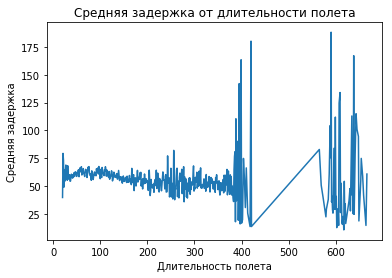

In [35]:

grouped_data = pd.DataFrame(filtered_flights_df.groupby([flights_df.air_time])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))

plt.plot(grouped_data.air_time, grouped_data.Mean_Delay_Departure,'')

plt.ylabel('Средняя задержка')
plt.xlabel('Длительность полета')
plt.title('Средняя задержка от длительности полета')
plt.show()

Как можно заметить, короткие рейсы чаще задерживают, но на незначительное время. А длинные рейсы если и задерживают, то на гораздо большее время

Проанализируем теперь задержки в разное время суток

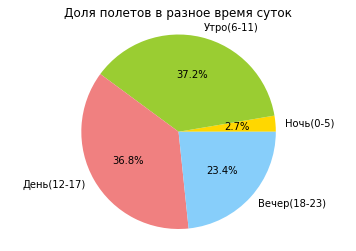

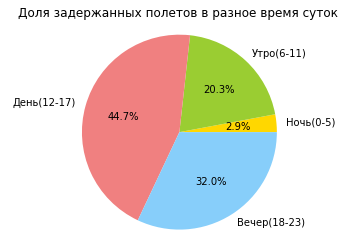

In [16]:

grouped_data = pd.DataFrame(flights_df.groupby([flights_df.hour])['dep_delay'].size().reset_index(name='Count'))
labels = 'Ночь(0-5)', 'Утро(6-11)', 'День(12-17)', 'Вечер(18-23)'
sizes=[0,0,0,0]
for i in range(6):
    sizes[0]+=grouped_data.Count[i]
    sizes[1]+=grouped_data.Count[i+6]
    sizes[2]+=grouped_data.Count[i+12]
    sizes[3]+=grouped_data.Count[i+18]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')

plt.title('Доля полетов в разное время суток')
plt.axis('equal')
plt.show()

grouped_data = pd.DataFrame(filtered_flights_df.groupby([flights_df.hour])['dep_delay'].size().reset_index(name='Count'))
labels = 'Ночь(0-5)', 'Утро(6-11)', 'День(12-17)', 'Вечер(18-23)'
sizes=[0,0,0,0]
for i in range(6):
    sizes[0]+=grouped_data.Count[i]
    sizes[1]+=grouped_data.Count[i+6]
    sizes[2]+=grouped_data.Count[i+12]
    sizes[3]+=grouped_data.Count[i+18]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')

plt.title('Доля задержанных полетов в разное время суток')
plt.axis('equal')
plt.show()


Как можно заметить, утром и днем примерно одинаковое число рейсов, а вечером их несколько меньше, а ночью почти вообще нет. 
А если рассмотреть задержку от времени суток, то утром их мало, а днем и вечером больше. Ночью же почти все рейсы были задержаны.
Проанализируем теперь это по часам.

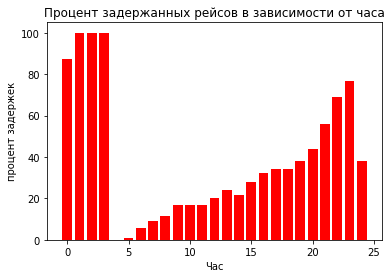

In [4]:
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.hour])['dep_delay'].size().reset_index(name='Count'))
grouped_data_non_filtered = pd.DataFrame(flights_df.groupby([flights_df.hour])['dep_delay'].size().reset_index(name='Total_Count'))
df_merged = pd.merge(grouped_data, grouped_data_non_filtered, on=['hour'])
df_merged['Percentage_Delays'] = (df_merged.Count/df_merged.Total_Count)*100
plt.bar(df_merged.hour, df_merged.Percentage_Delays, color="red")
plt.ylabel('Процент задержек')
plt.xlabel('Час')
plt.title('Процент задержанных рейсов в зависимости от часа')
plt.show()


Из полученных данных следует что почти все рейсы до 4 утра задерживают, затем процент задержанных рейсов постепенно увеличивается до 23.

Теперь проанализируем различные аэропорты

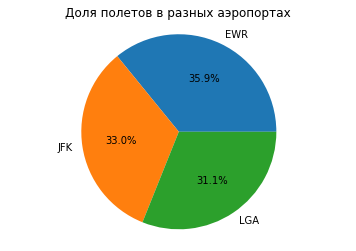

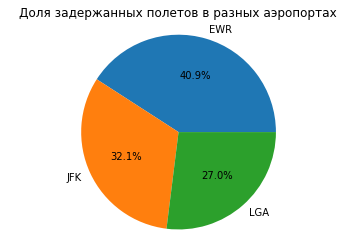

In [17]:
grouped_data = pd.DataFrame(flights_df.groupby([flights_df.origin])['dep_delay'].size().reset_index(name='Count'))
plt.pie(grouped_data.Count, labels=grouped_data.origin,autopct='%1.1f%%')

plt.title('Доля полетов в разных аэропортах')
plt.axis('equal')
plt.show()
grouped_data = pd.DataFrame(filtered_flights_df.groupby([flights_df.origin])['dep_delay'].size().reset_index(name='Count'))
plt.pie(grouped_data.Count, labels=grouped_data.origin,autopct='%1.1f%%')

plt.title('Доля задержанных полетов в разных аэропортах')
plt.axis('equal')
plt.show()

Выведем 10 первых по популярности рейсов и их средние задержки. А так же 10 направлений с самой маленькой и самой большой задержкой

In [56]:
grouped_data1 = pd.DataFrame(flights_df.groupby([flights_df.dest])['dep_delay'].size().reset_index(name='Count'))
grouped_data2= pd.DataFrame(flights_df.groupby([flights_df.dest])['dep_delay'].mean().reset_index(name='Mean'))
grouped_data= pd.merge(grouped_data1, grouped_data2, on=['dest'])
grouped_data=grouped_data.sort_values(by=('Count'), ascending=False)
grouped_data.head(10)
grouped_data=grouped_data.sort_values(by=('Mean'), ascending=False)



,dest,Count,Mean
18,CAE,116,35.570093
101,TUL,315,34.906355
67,OKC,346,30.568807
9,BHM,297,29.694853
103,TYS,631,28.493955
46,JAC,25,26.545455
31,DSM,569,26.232955
81,RIC,2454,23.639847
2,ALB,439,23.620525
60,MSN,572,23.580071


In [58]:
grouped_data.head(10)

,dest,Count,Mean
18,CAE,116,35.570093
101,TUL,315,34.906355
67,OKC,346,30.568807
9,BHM,297,29.694853
103,TYS,631,28.493955
46,JAC,25,26.545455
31,DSM,569,26.232955
81,RIC,2454,23.639847
2,ALB,439,23.620525
60,MSN,572,23.580071


In [57]:
grouped_data.tail(10)

,dest,Count,Mean
95,SNA,825,7.761905
96,SRQ,1211,7.256027
64,MVY,221,7.051643
104,XNA,1036,6.464886
1,ACK,265,6.456604
98,STT,522,4.613900
34,EYW,17,3.647059
77,PSP,19,-2.944444
50,LEX,1,-9.000000
51,LGA,1,NaN


Проанализируем как зависят задержки от погоды. Для этого отсортируем базу данных по месяцу, числу, часу и месту вылета.

In [62]:
groupby_output = filtered_flights_df.groupby([filtered_flights_df.origin, filtered_flights_df.month, filtered_flights_df.day, filtered_flights_df.hour])
grouped_origin_time_hour = groupby_output['dep_delay'].agg([np.size, np.mean]).reset_index()
df_weather_flights_merged = pd.merge(grouped_origin_time_hour, weather_df, on=['origin','hour','day','month'])
df_weather_flights_merged = df_weather_flights_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})

Посмотрим как задержка зависит от видимости.

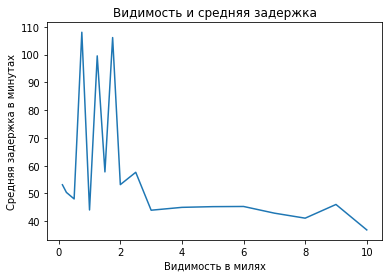

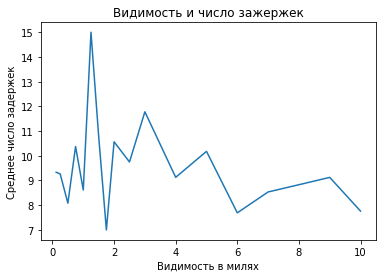

In [70]:

by_visib = df_weather_flights_merged.groupby([df_weather_flights_merged.visib])['TotalDelay', 'Count'].agg([np.mean]).reset_index()

plt.plot(by_visib.visib, by_visib.TotalDelay)

plt.ylabel('Средняя задержка в минутах')
plt.xlabel('Видимость в милях')
plt.title('Видимость и средняя задержка')
plt.show()

plt.plot(by_visib.visib, by_visib.Count)

plt.ylabel('Среднее число задержек')
plt.xlabel('Видимость в милях')
plt.title('Видимость и число зажержек')
plt.show()

Легко понять что чем меньше видимость, тем чаще задержки и тем они дольше